## Nome: Flávio Bezerra Pereira

fonte: https://towardsdatascience.com/how-to-estimate-salary-with-linear-regression-6e5511db28f6

# Regressão Linear

A regressão linear é um método bastante intuitivo para tentar entender relações entre variáveis através de um ajuste linear dos dados. Esse método é divididos em dois grupos, a regressão linear simples (RLS) e regressão linear múltipla (RLM). A RLS tem como objetivo estabelecer uma relação entre duas variáveis através de uma função, que pode ser definida por:

$$
y = a + b*x + \varepsilon,
$$
onde $y$ é a variável alvo, $a$ e $b$ são os coeficientes calculados pela regressão e, $x$ corresponde a variável explicativa e $\varepsilon$ corresponde ao erro cometido no ajuste.


A RLM é semelhante semelhante à RLS, porém possui múltiplas variáveis preditoras, e pode ser definida por:
$$
y = a + b_{1}*x_{1} + b_{2}x_{2} + \cdots + b_{n}x_{n},
$$
na qual  e $a$ e $b_{i}$ para $i = 1, \cdots, n$ são os parâmetros que vamos estimar com o nosso ajuste. O parâmetro $a$ é o coeficiente angular, ou seja, o valor de $y$ quando $x=0$ e, $b_{i}$ corresponde ao coeficiente angular da $i-$ésima variável.

### Nesta lista abordaremos os seguintes tópicos
* Importação de bibliotecas
* Visualização de informações básicas de um DataFrame
* Exploração dos dados
* Aplicação de uma técnica de Machine Learning
* Visualização do ajuste do modelo


## 1 -  Importando as bibliotecas

Substitua a tag `# SEU CÓDIGO AQUI #` pelo comando necessário para cumprir a tarefa.

Importe as bibliotecas necessárias para a leitura e visualização dos dados

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2 - Importando o conjunto de dados que vamos analisar

Vamos agora importar o conjunto de dados Salary_Data.csv. Esse conjunto de dados traz informações sobre o salário de diferentes pessoas de acordo com a experiência que possuem.

In [2]:
df = pd.read_csv('Salary_Data.csv')

## 3 -  Exibindo as primeiras linhas do Dataframe

Utilize o comando aprendido em aula para exibir as primeiras linhas do seu DataFrame.

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 4 -  Obtendo algumas estatísticas básicas para cada atributo

O objetivo aqui é testarem as funções vistas em aula que fornecem alguma estatítica descritiva para os atributos (variáveis) do seu DataFrame.

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 5 -  Verificando dados faltantes

Verifique se o conjunto de dados possui dados faltantes.

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Agora vamos ajustar um modelo de regressão linear ao conjunto de dados Salary_Data.csv. Como vimos em aula existem bibliotecas em python que facilitam a implementação de técnicas de Machine Learning (ML). O *Scikit-learn* é uma biblioteca de ML, com código aberto, que oferece suporte ao aprendizado supervisionado e não supervisionado. Ela também fornece várias ferramentas para ajuste de modelos, pré-processamento de dados, seleção de modelos, avaliação de modelos e muitas outras utilidades.

Alguns exemplos:
* Modelos
    * from sklearn.ensemble import RandomForestClassifier
    * from sklearn.linear_model import LinearRegression
    * from sklearn.linear_model import LogisticRegression
    
* Separação do dataset em treino e teste
    * from sklearn.model_selection import train_test_split
    
* Métricas de avaliação
    * from sklearn.metrics import accuracy_score

Para mais informações é possível consultar a documentação através do link: https://scikit-learn.org/stable/getting_started.html

## 6- Separação da target

Lembrando que antes de separarmos nosso dado em treino e teste precisamos separar a variável resposta (target), Identifique a variável resposta do problema e separe da variável explicativa.

In [6]:
X = df['YearsExperience'] # variavel explicativa
y = df['Salary'] # target

## 7 - Separando o conjunto de dados em treino e teste

Separe o conjunto de treino e teste utilizando a função train_test_split da biblioteca Sckit-learn, com tamanho do conjunto teste 1/3 e random_state=42.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 8 - Treinamento do modelo

Ajuste uma regressão linear simples ao conjunto de dados Salary_Data utilizando a função LinearRegression da biblioteca Sckit-learn.

In [8]:
# scikit-learn somente dados de treino e teste em um array de formato 2-dimensional
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 9 - Predição do modelo

Obtenha a predição do modelo ao conjunto de teste.

In [9]:
pred_test = model.predict(X_test)

## 10 - Visualização do ajuste

Visualize o ajuste do modelo para o conjunto de treino e teste.

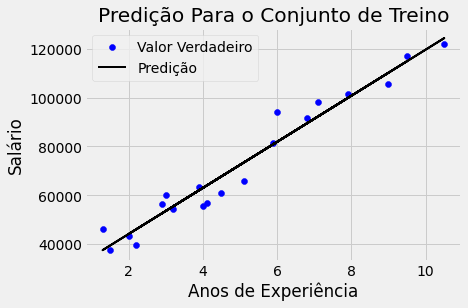

In [10]:
plt.style.use('fivethirtyeight')

# ajuste para o conjunto de treino
pred_train = pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="Valor Verdadeiro")
plt.plot(X_train, pred_train, color='black', linewidth=2, label="Predição")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title('Predição Para o Conjunto de Treino')
plt.legend()
plt.show()

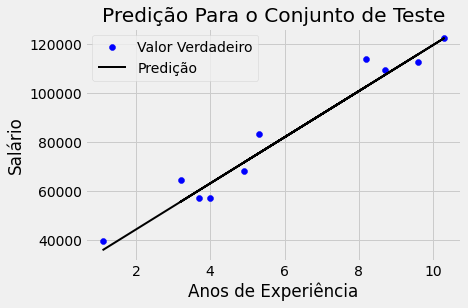

In [11]:
plt.figure()
plt.scatter(X_test, y_test, color='blue', label="Valor Verdadeiro")
plt.plot(X_test, pred_test, color='black', linewidth=2, label="Predição")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title('Predição Para o Conjunto de Teste')
plt.legend()
plt.show()